### Consider a model y = f(x) + e, with f(x) = 0.1 + 2*sqrt(x) -sin(x), and sigma = 0.3 (the population relation). Simulate a data set of size n=100. Fit polynomials of varying degree (1:10) and each case compute the AIC. Check whether AIC is selecting the same model as selected by the K-fold cross validation. In the class, we have already derived the expression for the log-likelihood and elaborated that how the AIC needs to be computed.


In [1]:
%matplotlib inline
import numpy as np
import math
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score 

C:\Users\khann\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-39.62251861 -40.50389708 -29.20897113 -30.09703256 -30.97859204
 -31.97717719 -32.94964889 -32.76850399 -33.76799956 -34.76705756]
2


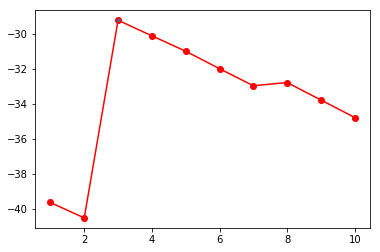

In [2]:
sigma=0.3
n=100
x=np.linspace(1,5,n)
y=0.1+2*np.sqrt(x)-np.sin(x)+np.random.normal(0,sigma,n)
deg=10
Aic=np.array(np.zeros((deg)))

s1=np.array(np.zeros((deg)))
for d in range(1,11):
    s1[d-1]=d+1+1
s=np.asarray(s1)    
print(s)    
print(Aic)
s2=np.array(np.zeros((deg)))
for degree in range(1,11):
        coefs = poly.polyfit(x, y, degree)
        ffit = poly.polyval(x, coefs)
        residual=y-ffit
        sigma_hat=np.sum((residual)**2)/n
        likelihood=np.prod((1/(np.sqrt(2*np.pi)*np.sqrt(sigma_hat)))*np.exp(-(1/(2*(sigma_hat)))*(y-ffit)**2))
        s2[degree-1]=np.log(likelihood)

Aic=s2-s 
print(Aic)
d=np.linspace(1,10,10)

max(Aic)
a=np.argmax(Aic)
print(a)
plt.plot(d,Aic,'ro-')
plt.plot(d[a],Aic[a],marker="*",markersize=3,markerfacecolor='g')

KFold(n_splits=20, random_state=None, shuffle=False)
3


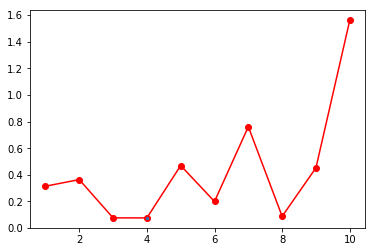

In [3]:
from sklearn.model_selection import KFold
import numpy.polynomial.polynomial as poly
b0=0.1
b1=2
b2=1
sigma=0.3
x=np.linspace(1,5,100)
n=len(x)
np.random.seed(123)
y=b0+b1*np.sqrt(x)-b2*np.sin(x)+np.random.normal(0,sigma,n)
n_splits=20
kf = KFold(n_splits)
ms_error=np.array(np.zeros((100,10)))
print(kf)
for i in range(1,100):
    for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for degree in range(1,11):
            coefs = poly.polyfit(X_train, y_train, degree)
            ffit = poly.polyval(X_test, coefs)
            ms_error[i-1,degree-1]=mean_squared_error(y_test, ffit)
    
    
mse=ms_error.mean(0)              
b=np.argmin(mse)
print(b)
deg=np.linspace(1,10,10)
plt.plot(deg,mse,'ro-')
plt.plot(deg[b],mse[b],marker="*",markersize=3,markerfacecolor='g')